In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import collections
import math

In [2]:
# Remove the outliers
def remove_outliers(file_path):
    # return the list of dataframes
    dataframe_lists = []
    # Creating the dataframe and selecting the required columns
    for i in range(64):
        df = pd.read_csv(file_path, usecols=[1,2,3,4], skiprows=i*72000, nrows = 72000, names=["lz","X","Y","Z"])
        df['radiusSquare'] = df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
        df['radius'] = np.sqrt(df['radiusSquare']).round(1)
        df['freq'] = df.groupby(['lz','radius'])['radius'].transform('count')
        for j in range(64):
            maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
            while maxfreq>100:
                df.drop(df[(df['lz']==j) & (df['freq']==maxfreq)].index, inplace=True)
                maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
                df.drop(df[(df['lz']==j) & (df['radius']==0)].index, inplace=True)
        dataframe_lists.append(df.iloc[:,1:4])
    return dataframe_lists

In [3]:
# atm = remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_initial_dataset/Atm/in.csv")
# This the second data set that contains multiple objects
allData= remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/in.csv")


mX=np.array(allData[0]['X'])
mY=np.array(allData[0]['Y'])
mZ=np.array(allData[0]['Z'])

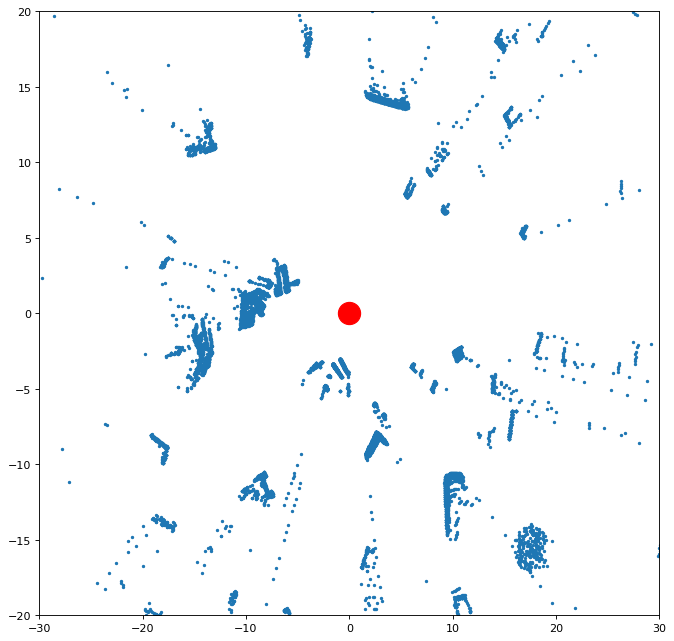

In [4]:
for i in range(0, 1):
    fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    #ax = fig.gca()
    #ax.set_xticks(np.arange(-120, 120, grid_size))
    #ax.set_yticks(np.arange(-120, 120, grid_size))

    plt.scatter(allData[i]['Z'], allData[i]['X'], s=4)
    plt.scatter(0, 0, s=400, c="red")
    plt.xlim(-30, 30)
    plt.ylim(-20, 20)
    plt.savefig(str(i)+'-image.png')
    plt.show()

In [69]:
newX=np.array(allData[0]['X'])
newY=np.array(allData[0]['Y'])
newZ=np.array(allData[0]['Z'])

# Filter positive data 
condition_1=(newZ>0)

newX_positives= newX[condition_1]
newY_positives= newY[condition_1]
newZ_positives= newZ[condition_1]


condition_2=(newX_positives>0)

x_Q1=newX_positives[condition_2]
y_Q1=newY_positives[condition_2]
z_Q1=newZ_positives[condition_2]


condition_3=(newX_positives<0)
x_Q2=newX_positives[condition_3]
y_Q2=newY_positives[condition_3]
z_Q2=newZ_positives[condition_3]


# Filter negative data 
condition_4=(newZ<0)

newX_negatives= newX[condition_4]
newY_negatives= newY[condition_4]
newZ_negatives= newZ[condition_4]

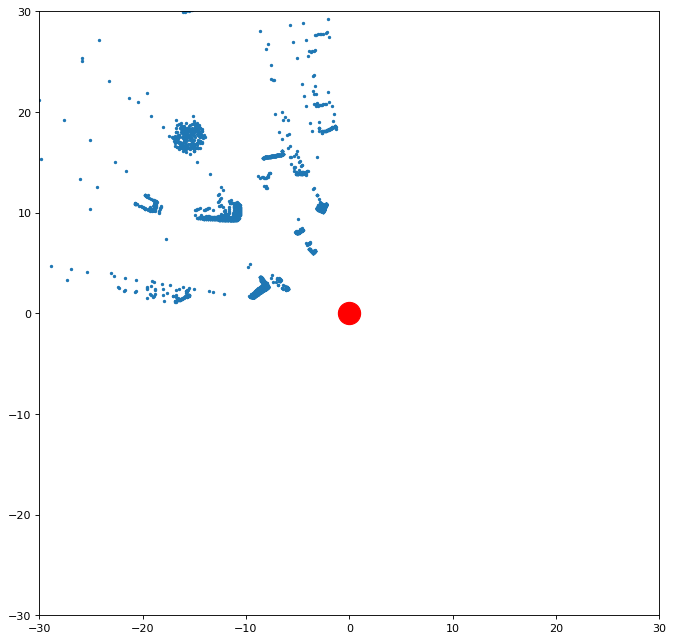

In [70]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
#ax = fig.gca()
#ax.set_xticks(np.arange(-120, 120, grid_size))
#ax.set_yticks(np.arange(-120, 120, grid_size))

plt.scatter(x_Q2, z_Q2, s=4)
plt.scatter(0, 0, s=400, c="red")

plt.xlim(-30, 30)
plt.ylim(-30, 30)

plt.show()

[55.24293812 55.24294415 55.24292608 ...  2.3666705   2.36667059
  2.36667097]
[-2.76108017 -3.18672402 -3.6127351  ... -1.11673055 -1.18137036
 -1.24614945]


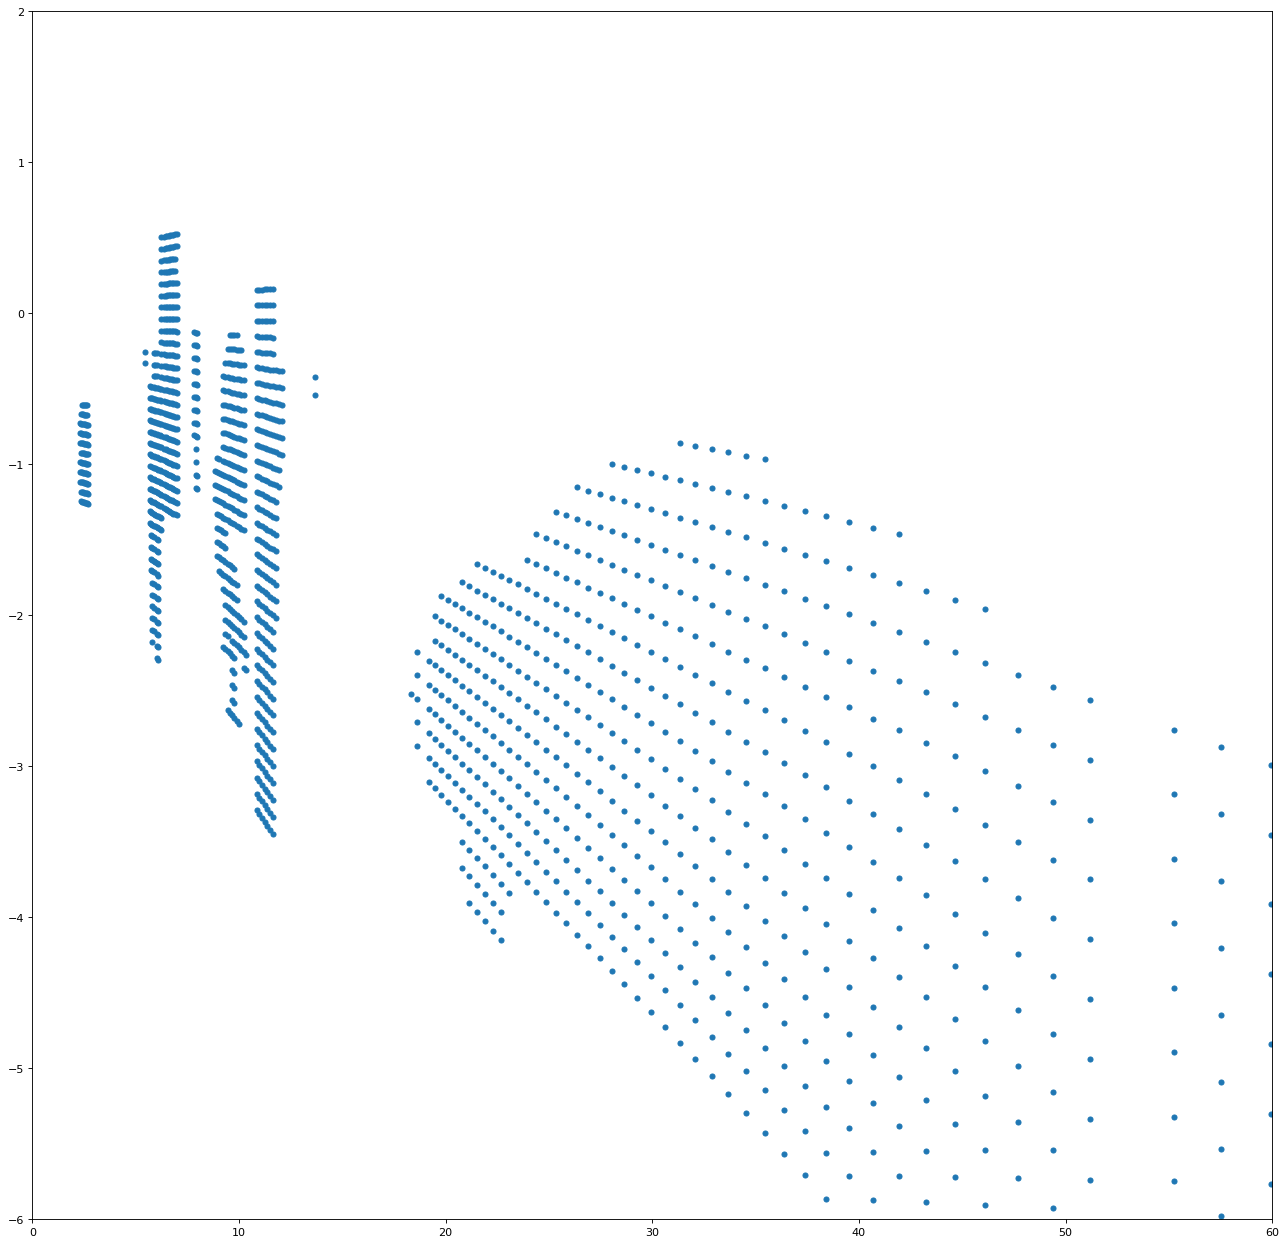

In [112]:
d =  8

x_Q1_pri = np.divide(x_Q1, z_Q1/d)
y_Q1_pri = np.divide(y_Q1, z_Q1/d)

print(x_Q1_pri)
print(y_Q1_pri)

fig = plt.figure(figsize=(20, 20), dpi= 80)
plt.scatter(x_Q1_pri, y_Q1_pri, s=20)

plt.xlim(0, +60)
plt.ylim(-6, +2)
# plt.grid()
plt.show()

-0.5594143990837831
-9.035997793712546


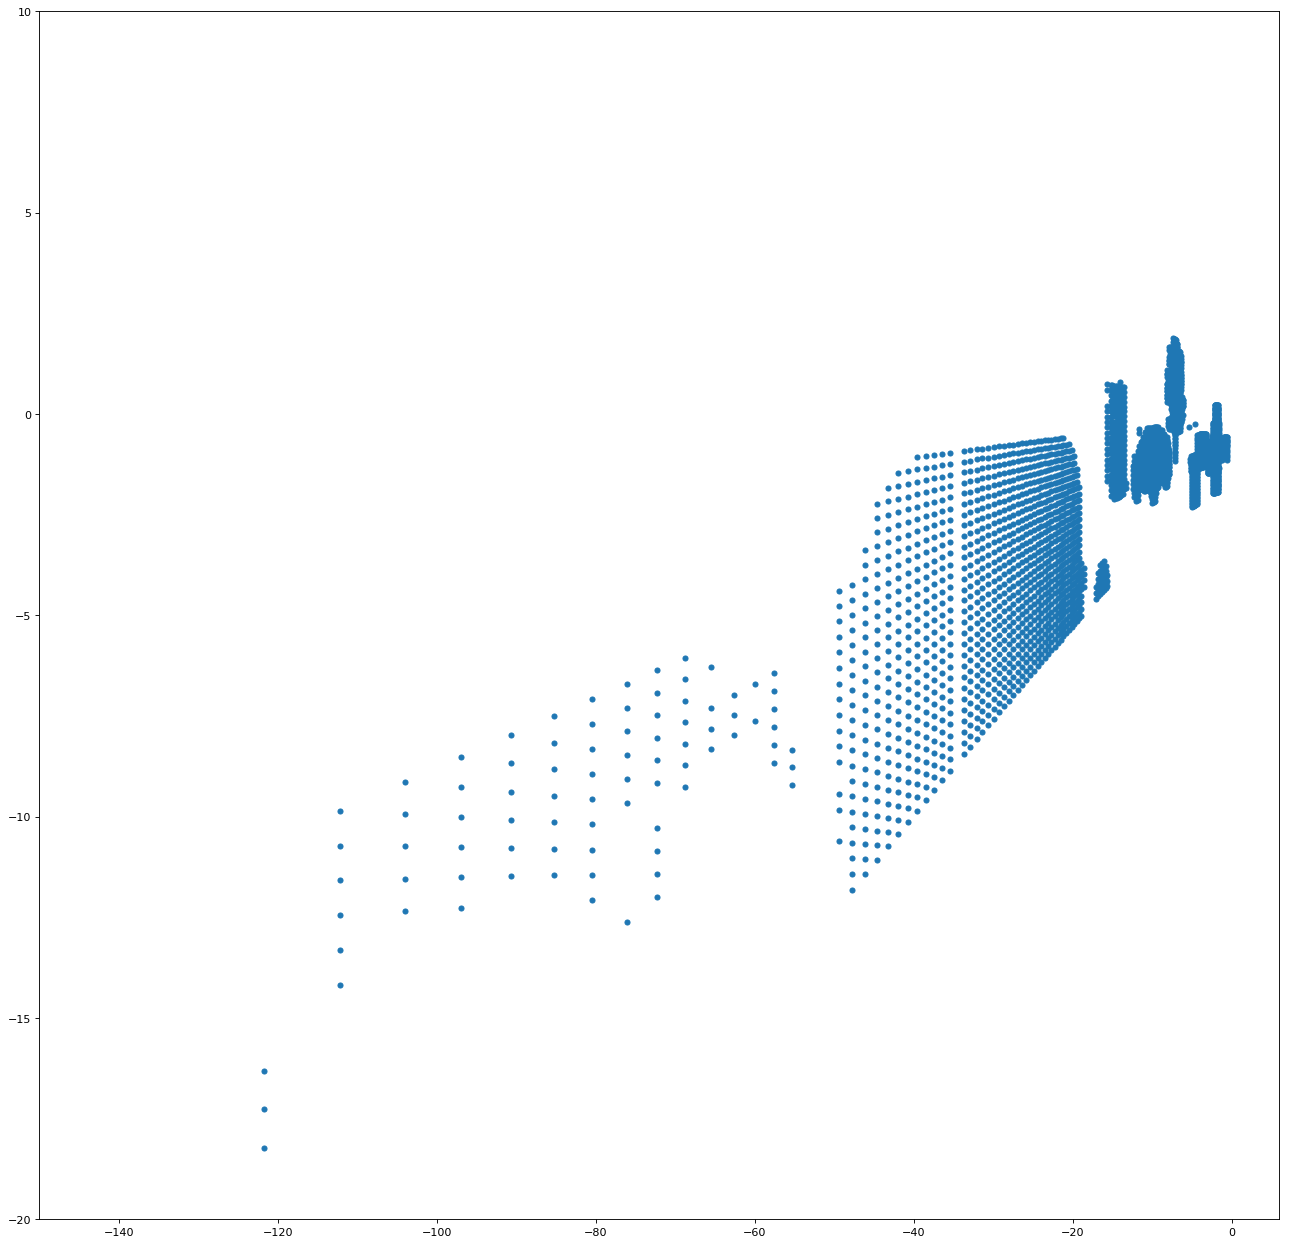

In [111]:
d =  8

x_Q2_pri = np.divide(x_Q2, z_Q2/d)
y_Q2_pri = np.divide(y_Q2, z_Q2/d)


fig = plt.figure(figsize=(20, 20), dpi= 80)
plt.scatter(x_Q2_pri, y_Q2_pri, s=20)
print(max(x_Q2_pri))
print(np.median(x_Q2_pri))
plt.xlim(-150,6)
plt.ylim(-20, +10)
# plt.grid()
plt.show()

In [61]:
a=np.array([1,2])
b=np.array([3,4])

c=np.array(list(zip(a,b)))
print(c[:,0])

print(c[:,1])

[1 2]
[3 4]
